The previous two notebooks might have gotten your attention but usually we get the response; 

> But what about BERT-embeddings? 

Let's explain how to get there, but first ... we should explain languages.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from whatlies import Embedding, EmbeddingSet
import spacy 
import matplotlib.pylab as plt

## Multi-Token Embeddings

We can also have embeddings that represent more than one token. If we'd do this via spacy, we'd have a an average of all the word embeddings.

In [3]:
nlp = spacy.load("en_core_web_md")

contexts = ("this snake is a python",
            "i like to program in python",
            "programming is super fun!",
            "i go to the supermarket",
            "i like to code", 
            "i love animals")

t = EmbeddingSet({k: Embedding(k, nlp(k).vector) for k in contexts})

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


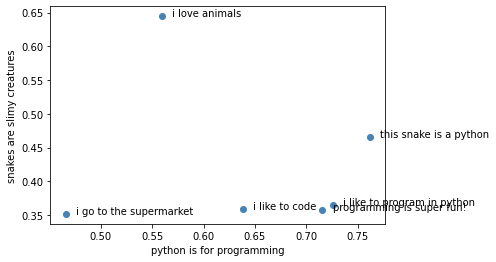

In [4]:
x_str, y_str = "python is for programming", "snakes are slimy creatures"
x_axis = Embedding(x_str, nlp(x_str).vector)
y_axis = Embedding(y_str, nlp(y_str).vector)
t.plot(kind="text", x_axis=x_axis, y_axis=y_axis).plot(kind="scatter", x_axis=x_axis, y_axis=y_axis);

## Embeddings of Tokens with Context

But maybe we'd like to have BERT-style models. These models work differently. Luckily ... spaCy also supports this these days. 

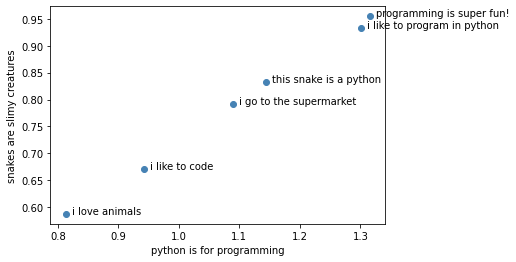

In [5]:
nlp = spacy.load("en_trf_robertabase_lg")

contexts = ("this snake is a python",
            "i like to program in python",
            "programming is super fun!",
            "i go to the supermarket",
            "i like to code", 
            "i love animals")

t = EmbeddingSet({k: Embedding(k, nlp(k).vector) for k in contexts})

x_str, y_str = "python is for programming", "snakes are slimy creatures"
x_axis = Embedding(x_str, nlp(x_str).vector)
y_axis = Embedding(y_str, nlp(y_str).vector)
t.plot(kind="text", x_axis=x_axis, y_axis=y_axis).plot(kind="scatter", x_axis=x_axis, y_axis=y_axis);

We can go a step further too. If we have the sentence `this snake is a python` then an algorithm like Bert will not apply seperate word embeddings for each token. Rather, the entire document will first learn it's representation before assigning it to seperate tokens. If you are interested in a Bert representation of a word given the context that it is in ... you can get them with a special syntax.

In [6]:
contexts = ("i put my money on the [bank]",
            "the water flows on the river [bank]",
            "i really like [to swim] in water",
            "i want to be so rich that i am [drowning] in money",
            "i have plenty of [cash] on me",)

But to make use of this syntax we need a new object; the `Language` object. This is a tool for `whatlies` to grab the appropriate word embeddings on your behalf. It will handle the context but can also be seen as a lazy `EmbeddingSet`.

In [7]:
from whatlies.language import SpacyLanguage

lang = SpacyLanguage("en_trf_robertabase_lg")

In [8]:
t = EmbeddingSet({k: lang[k] for k in contexts})

EmbSet

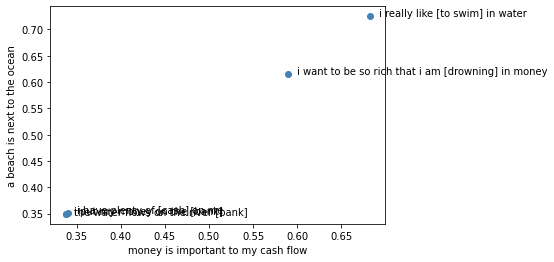

In [9]:
x_axis = lang["money is important to my cash flow"]
y_axis = lang["a beach is next to the ocean"]

(t
 .plot(kind="text", x_axis=x_axis, y_axis=y_axis)
 .plot(kind="scatter", x_axis=x_axis, y_axis=y_axis))

## Realisation 

This is the demo so-far. Still ... this is a nice preview of what is possible. 

Future Features; 

- if the plotting backend is plotly/c3 then we should be able to host interactive versions on the blog
- we might want to have a `LazyEmbeddingSet` such that we can also compute distances between tokens lazily, it would also be nice to have an object where we can say "use this backend" so that we might compare plots for different trained embeddings
- allow the creation of a random vector too
- there are also other transformations that you might want to apply ... PCA for example ...

That said; give all feedback to Vincent and he will **WorkWork[tm]**.